#### GRASP x BASELINE x GREEDY RESULTS COMPARISON

Only run the two cells bellow if you are going to compute results manually

In [ ]:
# import pandas as pd
# from pathlib import PurePath

# def read_rsus(file: PurePath):

#     rsus = []
#     with open(file=file, mode="r") as f:

#         for line in f.readlines():
#             rsus.append(tuple(map(int, line.strip().split(","))))

#     return rsus

# def get_vehicles_covered_based_on_n_deployment(
#     rsus_pos: list | set, 
#     vehicles_trace_df: pd.DataFrame, 
#     n_contacts: int, contacts_time_threshold: int
# ) -> list:

#     start_time = -1
#     current_vehicle = -1
#     i = 0
#     vehicles_num_contacts = {vehicle_id : 0 for vehicle_id in vehicles_trace_df["vehicle_id"].unique()}
#     trace_as_list = list(vehicles_trace_df.itertuples(index=False, name=None))
#     while i < len(trace_as_list):

#         vehicle_id = trace_as_list[i][0]
#         time_instant = trace_as_list[i][1]
#         grid_x_pos = trace_as_list[i][2]
#         grid_y_pos = trace_as_list[i][3]
#         time_in_cell = trace_as_list[i][4]

#         if current_vehicle == vehicle_id:

#             if (((grid_x_pos, grid_y_pos) in rsus_pos)
#                 and (time_instant <= (start_time + contacts_time_threshold))):
#                 vehicles_num_contacts[vehicle_id] += 1

#         else:

#             current_vehicle = vehicle_id
#             start_time = time_instant
#             i -= 1

#         i += 1

#     covered_vehicles = []
#     for vehicle_id, contacts in vehicles_num_contacts.items():
#         if contacts >= n_contacts:
#             covered_vehicles.append(vehicle_id)

#     return covered_vehicles

In [21]:
# import pandas as pd
# from pathlib import PurePath
# df = pd.read_csv(PurePath("..") / '6_to_8am.csv', sep=';', header=None, names=['vehicle_id', 'time', 'x', 'y', 'duration'], index_col=False)

#### GRASP RESULTS (run second cell to get saved results)

In [22]:
# import pickle

# results_path = PurePath("..") / ("grasp_src") / "1con_results" / "rsu=[43_423_10]"
# grasp_cov = []
# for n_rsus in range(43, 424, 10):
#     rsus_path = results_path / f"rsu={n_rsus}_tau=30_rcl=15_iter=1000_cont=1_rsus.csv"
#     rsus = read_rsus(rsus_path)
#     cov = len(get_vehicles_covered_based_on_n_deployment(rsus, df, 1, 30))
#     print(f"\tgrasp ({n_rsus} rsus):", cov)
#     grasp_cov.append(cov)

# with open("grasp_cov.pkl", "wb") as file:
#    pickle.dump(grasp_cov, file)

In [23]:
import pickle
with open("grasp_cov.pkl", "rb") as file:
    grasp_cov = pickle.load(file)

#### BASELINE RESULTS (run second cell to get saved results)

In [24]:
# results_path = PurePath("..") / "baseline_src" / "baseline_results" / "rsu=[43_423_10]"
# baseline_cov = []
# for n_rsus in range(43, 424, 10):
#     rsus_path = results_path / f"n={n_rsus}_rsus.csv"
#     rsus = read_rsus(rsus_path)
#     cov = len(get_vehicles_covered_based_on_n_deployment(rsus, df, 1, 30))
#     print(f"\tbaseline ({n_rsus} rsus):", cov)
#     baseline_cov.append(cov)

# with open("baseline_cov.pkl", "wb") as file:
#    pickle.dump(baseline_cov, file)

In [25]:
import pickle
with open("baseline_cov.pkl", "rb") as file:
    baseline_cov = pickle.load(file)

#### GREEDY RESULTS (run cell below to get saved results)

In [26]:
# results_path = PurePath("..") / "greedy_src" / "greedy_results" / "rsu=[43_423_10]"
# greedy_cov = []
# for n_rsus in range(43, 424, 10):
#     rsus_path = results_path / f"rsu={n_rsus}_tau=30_cont=1_rsus.csv"
#     rsus = read_rsus(rsus_path)
#     cov = len(get_vehicles_covered_based_on_n_deployment(rsus, df, 1, 30))
#     print(f"\tgreedy ({n_rsus} rsus):", cov)
#     greedy_cov.append(cov)

# with open("greedy_cov.pkl", "wb") as file:
#    pickle.dump(greedy_cov, file)

In [27]:
import pickle
with open("greedy_cov.pkl", "rb") as file:
    greedy_cov = pickle.load(file)

#### RESULTS DISPLAY

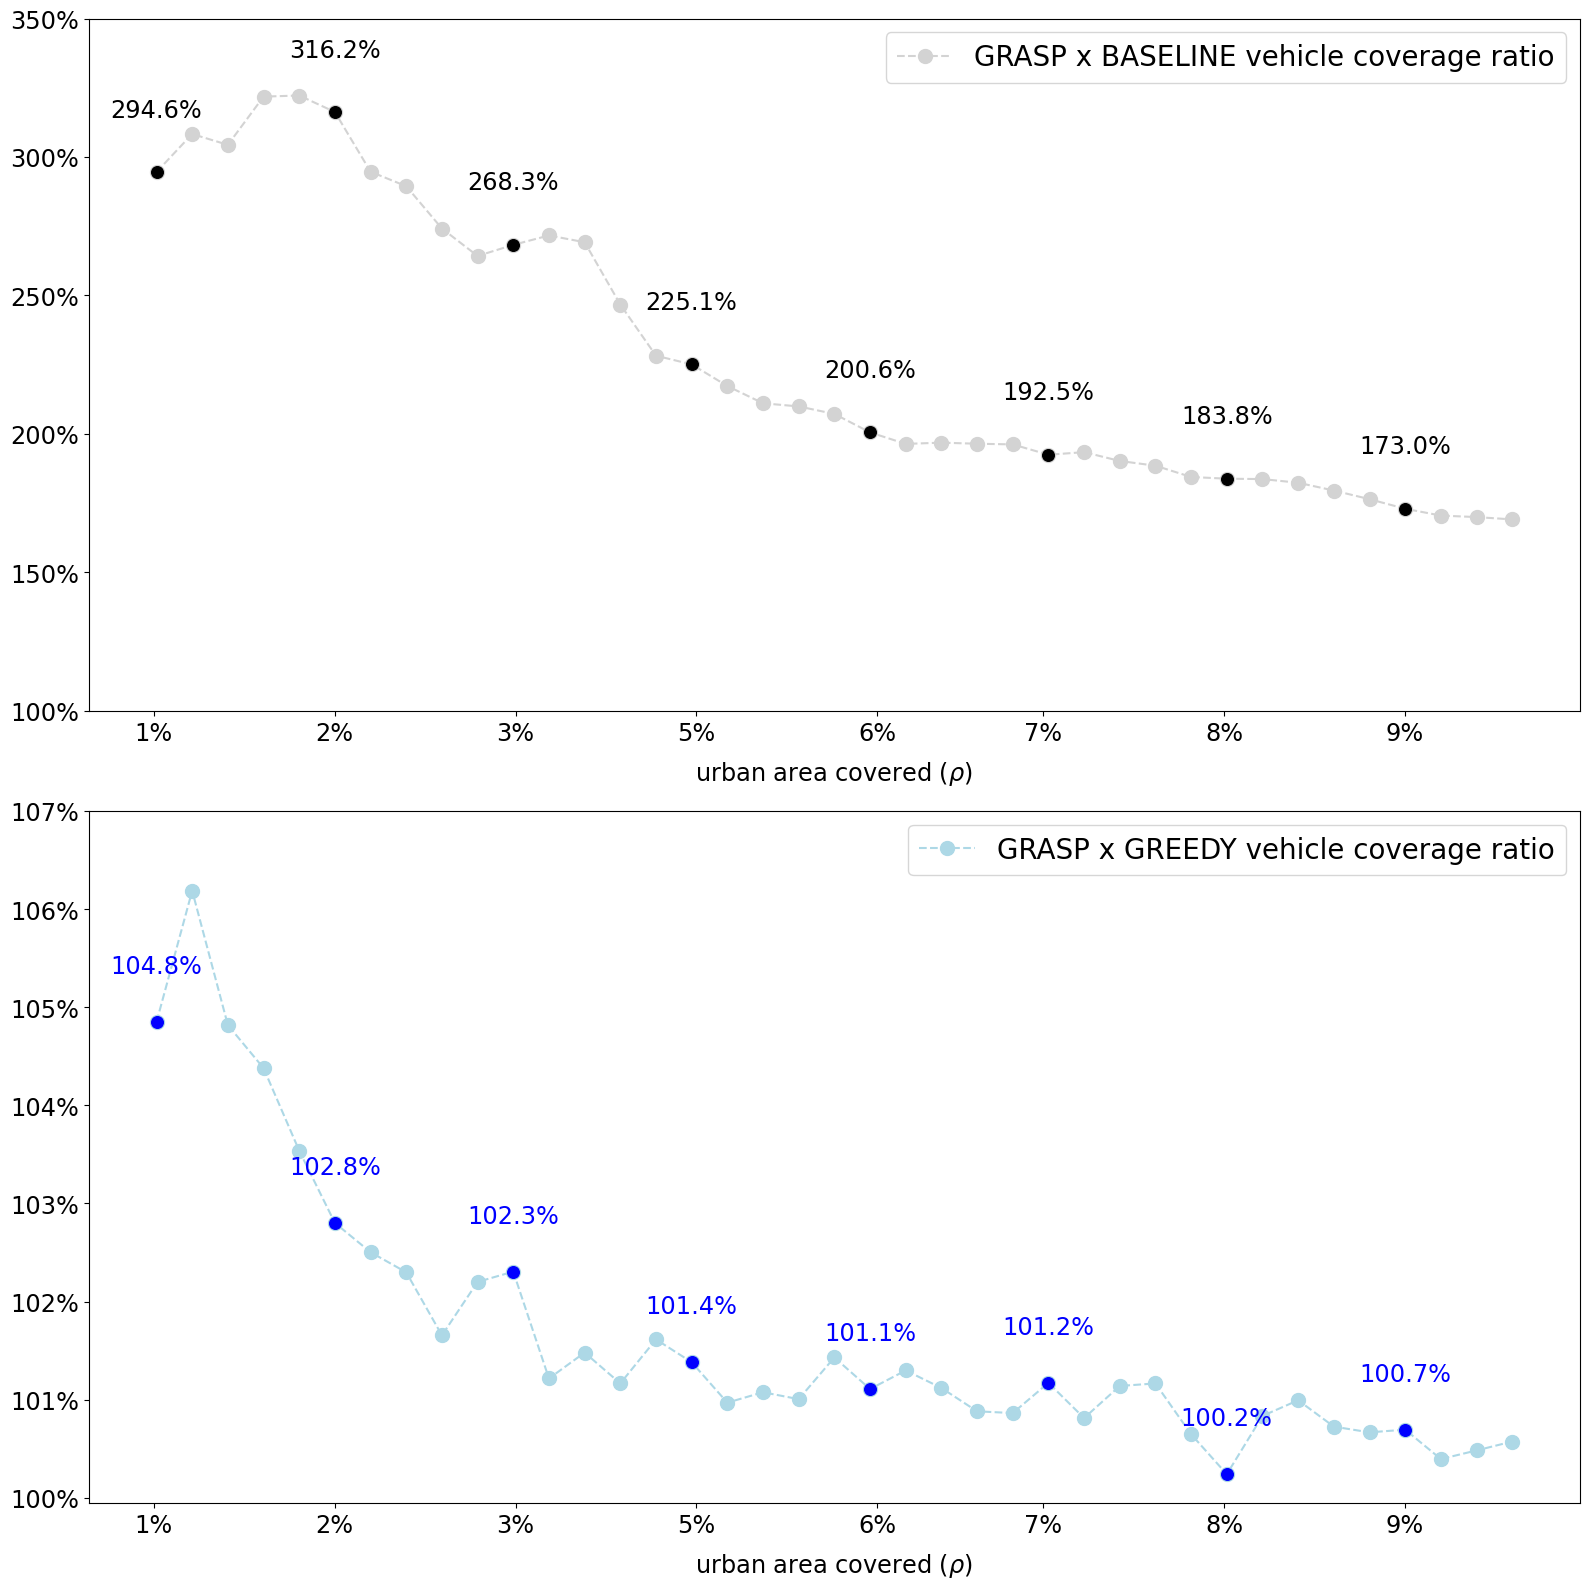

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, figsize=(16, 16))

rsu_range = range(43, 424, 10)

x = [rsu * 100 / 4225 for rsu in rsu_range]

coverage_ratio = [100 * (grasp_cov / dl_cov) for grasp_cov, dl_cov in zip(grasp_cov, baseline_cov)]
axes[0].plot(
    x, coverage_ratio, 
    marker="o", 
    markersize=10,
    color="lightgray", 
    linestyle='--', 
    label=f"GRASP x BASELINE vehicle coverage ratio",
    zorder=0
)

axes[0].scatter([x[i] for i in range(len(x)) if i % 5 == 0], [coverage_ratio[i] for i in range(len(x)) if i % 5 == 0], 
                color="black", zorder=1, s=70)

for i in range(len(x)):
    if i % 5 == 0:
        axes[0].text(x[i], coverage_ratio[i] + 20, f"{coverage_ratio[i]:.1f}%",
            fontsize="xx-large", ha='center', color='black')

coverage_ratio = [100 * (grasp_cov / dl_cov) for grasp_cov, dl_cov in zip(grasp_cov, greedy_cov)]
axes[1].plot(
    x, coverage_ratio,
    marker="o",
    markersize=10,
    color="lightblue",
    linestyle="--",
    label=f"GRASP x GREEDY vehicle coverage ratio",
    zorder=0
)

axes[1].scatter([x[i] for i in range(len(x)) if i % 5 == 0], [coverage_ratio[i] for i in range(len(x)) if i % 5 == 0], 
                color="blue", zorder=1, s=70)

for i in range(len(x)):
    if i % 5 == 0:
        axes[1].text(x[i], coverage_ratio[i] + 0.5, f"{coverage_ratio[i]:.1f}%",
            fontsize="xx-large", ha='center', color='blue')

axes[0].set_xlabel(r"urban area covered ($\rho$)", fontsize="xx-large", labelpad=10)
axes[1].set_xlabel(r"urban area covered ($\rho$)", fontsize="xx-large", labelpad=10)

axes[0].set_yticks(range(100, 400, 50))
axes[1].set_yticks(range(100, 108, 1))

from matplotlib.ticker import FuncFormatter
percent_formatter = FuncFormatter(lambda y, _: f"{y:.0f}%")
axes[0].xaxis.set_major_formatter(percent_formatter)
axes[1].xaxis.set_major_formatter(percent_formatter)
axes[0].yaxis.set_major_formatter(percent_formatter)
axes[1].yaxis.set_major_formatter(percent_formatter)

axes[0].set_xticks([round(x[i], 1) for i in range(len(x)) if i % 5 == 0])
axes[1].set_xticks([round(x[i], 1) for i in range(len(x)) if i % 5 == 0])

axes[0].tick_params(axis='both', labelsize="xx-large")
axes[1].tick_params(axis='both', labelsize="xx-large")

axes[0].legend(loc="upper right", fontsize=20)
axes[1].legend(loc="upper right", fontsize=20)

plt.savefig("grasp_vs_baseline_n_greedy.pdf", bbox_inches="tight")
plt.savefig("grasp_vs_baseline_n_greedy.png", bbox_inches="tight")

plt.tight_layout()

plt.show()
